<a href="https://colab.research.google.com/github/andsonandreribeiro09/Simulador_Juridico_Socrates_IA/blob/main/Coleta_dados_Stj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte:  "https://api-publica.datajud.cnj.jus.br/api_publica_stj/_search"

Fonte:https://portal.stf.jus.br/

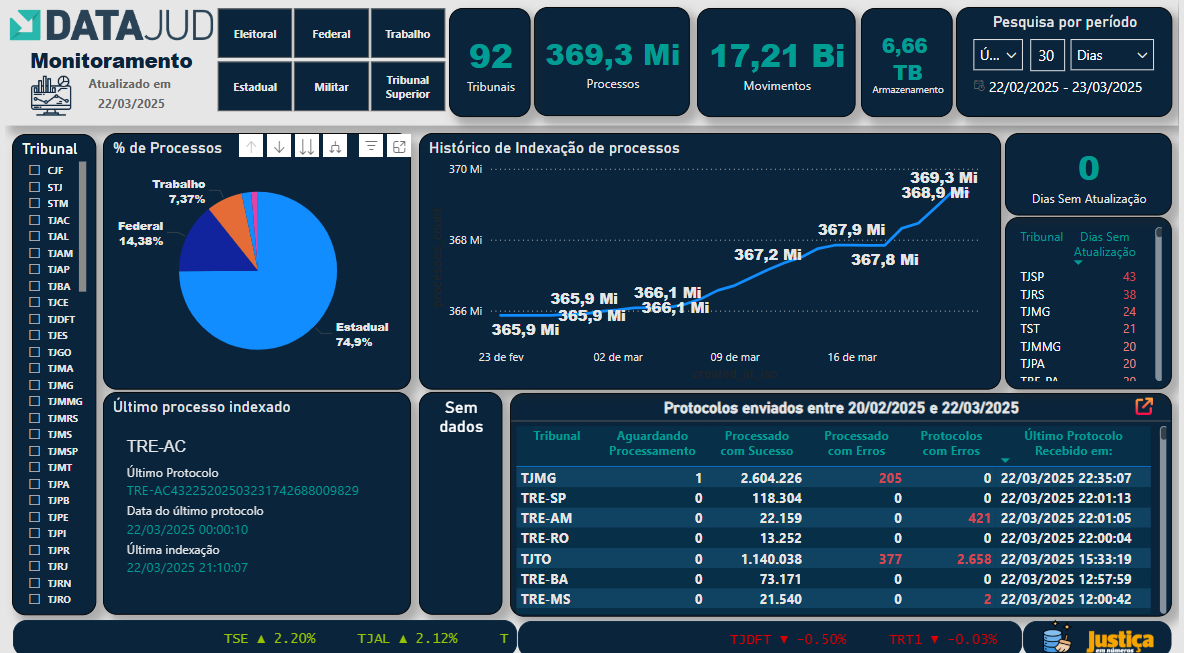

**termos_de_interesse**

[
    "liberdade de expressão", "crime contra o Estado", "corrupção de menores",
    "direitos fundamentais", "liberdade de manifestação", "censura", "liberdade de imprensa",
    "liberdade de opinião", "direitos civis", "democracia", "subversão",
    "sabotagem", "traição", "conspiração", "atentado à ordem pública",
    "ameaça à segurança nacional"
]

In [ ]:
import requests
import json
import pandas as pd

# URL da API
url = "https://api-publica.datajud.cnj.jus.br/api_publica_stj/_search"

# Cabeçalhos com a chave da API
headers = {
    "Authorization": "ApiKey cDZHYzlZa0JadVREZDJCendQbXY6SkJlTzNjLV9TRENyQk1RdnFKZGRQdw==",
    "Content-Type": "application/json"
}

# Fazendo a requisição
response = requests.get(url, headers=headers)

# Verifica se a resposta foi bem-sucedida
if response.status_code == 200:
    data = response.json()

In [ ]:
 # Obtendo as chaves principais do JSON
def extrair_chaves(dado, prefixo=""):
    """Recursivamente extrai as chaves do JSON."""
    chaves = []
    if isinstance(dado, dict):
        for k, v in dado.items():
            chaves.extend(extrair_chaves(v, prefixo + k + "."))
    elif isinstance(dado, list) and dado:
        chaves.extend(extrair_chaves(dado[0], prefixo + "[]."))
    else:
        chaves.append(prefixo.rstrip("."))
    return chaves

# Extrai todas as chaves do JSON
chaves = extrair_chaves(data)

print("\nVariáveis disponíveis nos dados:")
for chave in chaves:
    print(chave)




Variáveis disponíveis nos dados:
took
timed_out
_shards.total
_shards.successful
_shards.skipped
_shards.failed
hits.total.value
hits.total.relation
hits.max_score
hits.hits.[]._index
hits.hits.[]._id
hits.hits.[]._score
hits.hits.[]._source.classe.codigo
hits.hits.[]._source.classe.nome
hits.hits.[]._source.numeroProcesso
hits.hits.[]._source.sistema.codigo
hits.hits.[]._source.sistema.nome
hits.hits.[]._source.formato.codigo
hits.hits.[]._source.formato.nome
hits.hits.[]._source.tribunal
hits.hits.[]._source.dataHoraUltimaAtualizacao
hits.hits.[]._source.grau
hits.hits.[]._source.@timestamp
hits.hits.[]._source.dataAjuizamento
hits.hits.[]._source.movimentos.[].complementosTabelados.[].codigo
hits.hits.[]._source.movimentos.[].complementosTabelados.[].valor
hits.hits.[]._source.movimentos.[].complementosTabelados.[].nome
hits.hits.[]._source.movimentos.[].complementosTabelados.[].descricao
hits.hits.[]._source.movimentos.[].codigo
hits.hits.[]._source.movimentos.[].nome
hits.hits.[]

In [ ]:
import pandas as pd

# Supondo que `data` seja o JSON já carregado (via requests.get(...).json())
registros = []

for item in data.get("hits", {}).get("hits", []):
    src = item.get("_source", {})
    movimentos = src.get("movimentos", [])
    assuntos = src.get("assuntos", [])

    # Pegando complementos dos movimentos (se houver)
    for movimento in movimentos:
        for complemento in movimento.get("complementosTabelados", [{}]):
            for assunto in assuntos or [{}]:  # garante uma iteração mesmo se lista estiver vazia
                registros.append({
                    "classe.codigo": src.get("classe", {}).get("codigo"),
                    "classe.nome": src.get("classe", {}).get("nome"),
                    "numeroProcesso": src.get("numeroProcesso"),
                    "sistema.codigo": src.get("sistema", {}).get("codigo"),
                    "sistema.nome": src.get("sistema", {}).get("nome"),
                    "formato.codigo": src.get("formato", {}).get("codigo"),
                    "formato.nome": src.get("formato", {}).get("nome"),
                    "tribunal": src.get("tribunal"),
                    "dataHoraUltimaAtualizacao": src.get("dataHoraUltimaAtualizacao"),
                    "grau": src.get("grau"),
                    "@timestamp": src.get("@timestamp"),
                    "dataAjuizamento": src.get("dataAjuizamento"),
                    "movimentos.codigo": movimento.get("codigo"),
                    "movimentos.nome": movimento.get("nome"),
                    "movimentos.dataHora": movimento.get("dataHora"),
                    "complementosTabelados.codigo": complemento.get("codigo"),
                    "complementosTabelados.valor": complemento.get("valor"),
                    "complementosTabelados.nome": complemento.get("nome"),
                    "complementosTabelados.descricao": complemento.get("descricao"),
                    "id": src.get("id"),
                    "nivelSigilo": src.get("nivelSigilo"),
                    "orgaoJulgador.codigoMunicipioIBGE": src.get("orgaoJulgador", {}).get("codigoMunicipioIBGE"),
                    "orgaoJulgador.codigo": src.get("orgaoJulgador", {}).get("codigo"),
                    "orgaoJulgador.nome": src.get("orgaoJulgador", {}).get("nome"),
                    "assuntos.codigo": assunto.get("codigo"),
                    "assuntos.nome": assunto.get("nome"),
                })

# Criar DataFrame
df = pd.DataFrame(registros)

# Exibir as primeiras linhas
print(df.head())

   classe.codigo           classe.nome        numeroProcesso  sistema.codigo  \
0           1029  Mandado de Segurança  03311110820193000000               8   
1           1029  Mandado de Segurança  03311110820193000000               8   
2           1029  Mandado de Segurança  03311110820193000000               8   
3           1029  Mandado de Segurança  03311110820193000000               8   
4           1029  Mandado de Segurança  03311110820193000000               8   

  sistema.nome  formato.codigo formato.nome tribunal  \
0       Outros               1   Eletrônico      STJ   
1       Outros               1   Eletrônico      STJ   
2       Outros               1   Eletrônico      STJ   
3       Outros               1   Eletrônico      STJ   
4       Outros               1   Eletrônico      STJ   

  dataHoraUltimaAtualizacao grau  ... complementosTabelados.valor  \
0  2025-04-14T14:50:54.360Z  SUP  ...                       107.0   
1  2025-04-14T14:50:54.360Z  SUP  ...       

In [ ]:
df

,classe.codigo,classe.nome,numeroProcesso,sistema.codigo,sistema.nome,formato.codigo,formato.nome,tribunal,dataHoraUltimaAtualizacao,grau,...,complementosTabelados.valor,complementosTabelados.nome,complementosTabelados.descricao,id,nivelSigilo,orgaoJulgador.codigoMunicipioIBGE,orgaoJulgador.codigo,orgaoJulgador.nome,assuntos.codigo,assuntos.nome
0,1029,Mandado de Segurança,03311110820193000000,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:54.360Z,SUP,...,107.0,Certidão,tipo_de_documento,STJ_SUP_03311110820193000000,0,5300108,76790,VICE-PRESIDÃNCIA,10229,Remoção
1,1029,Mandado de Segurança,03311110820193000000,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:54.360Z,SUP,...,1.0,competência exclusiva,tipo_de_distribuicao_redistribuicao,STJ_SUP_03311110820193000000,0,5300108,76790,VICE-PRESIDÃNCIA,10229,Remoção
2,1029,Mandado de Segurança,03311110820193000000,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:54.360Z,SUP,...,6.0,para decisão,tipo_de_conclusao,STJ_SUP_03311110820193000000,0,5300108,76790,VICE-PRESIDÃNCIA,10229,Remoção
3,1029,Mandado de Segurança,03311110820193000000,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:54.360Z,SUP,...,57.0,Petição (outras),tipo_de_peticao,STJ_SUP_03311110820193000000,0,5300108,76790,VICE-PRESIDÃNCIA,10229,Remoção
4,1029,Mandado de Segurança,03311110820193000000,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:54.360Z,SUP,...,57.0,Petição (outras),tipo_de_peticao,STJ_SUP_03311110820193000000,0,5300108,76790,VICE-PRESIDÃNCIA,10229,Remoção
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,11881,Agravo em Recurso Especial,00600968120108260114,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:55.453Z,SUP,...,NaN,None,None,STJ_SUP_00600968120108260114,0,5300108,76776,GABINETE DO MINISTRO ROGERIO SCHIETTI,5555,Crime Tentado
689,11881,Agravo em Recurso Especial,00600968120108260114,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:55.453Z,SUP,...,NaN,None,None,STJ_SUP_00600968120108260114,0,5300108,76776,GABINETE DO MINISTRO ROGERIO SCHIETTI,10599,Quesitos
690,11881,Agravo em Recurso Especial,00600968120108260114,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:55.453Z,SUP,...,NaN,None,None,STJ_SUP_00600968120108260114,0,5300108,76776,GABINETE DO MINISTRO ROGERIO SCHIETTI,3372,Homicídio Qualificado
691,11881,Agravo em Recurso Especial,00600968120108260114,8,Outros,1,Eletrônico,STJ,2025-04-14T14:50:55.453Z,SUP,...,NaN,None,None,STJ_SUP_00600968120108260114,0,5300108,76776,GABINETE DO MINISTRO ROGERIO SCHIETTI,5555,Crime Tentado


A query para buscar assuntos no STF geralmente se refere a uma consulta estruturada usada para buscar informações jurídicas, jurisprudências e decisões do Supremo Tribunal Federal (STF) em seus bancos de dados ou APIs públicas.

In [ ]:
# Query para buscar assuntos no STF
payload = {
    "_source": ["assuntos.nome"],  # Buscando apenas os assuntos
    "query": {
        "match_all": {}  # Buscando todos os documentos disponíveis
    },
    "size": 1000  # Número de resultados (ajuste conforme necessário)
}

# Enviar requisição para a API
response = requests.post(url, headers=headers, json=payload)

# Verificar resposta
if response.status_code == 200:
    dados = response.json()

    if dados["hits"]["total"]["value"] > 0:
        print(f"🔍 {dados['hits']['total']['value']} processos encontrados no STF!\n")

        # Exibir os primeiros assuntos disponíveis
        assuntos_encontrados = set()  # Para garantir que os assuntos não se repitam
        for processo in dados["hits"]["hits"]:
            assuntos = processo["_source"].get("assuntos", [])
            if isinstance(assuntos, list):  # Garantir que seja uma lista
                for assunto in assuntos:
                    if isinstance(assunto, dict) and "nome" in assunto:
                        assuntos_encontrados.add(assunto["nome"])

        # Exibir todos os assuntos encontrados
        print("📝 Assuntos encontrados no STF:")
        for assunto in sorted(assuntos_encontrados):
            print(f" - {assunto}")

    else:
        print("⚠️ Nenhum processo encontrado no STF.")

else:
    print(f"Erro ao acessar a API: {response.status_code}")
    print(response.text)  # Exibe erro detalhado

🔍 10000 processos encontrados no STF!

📝 Assuntos encontrados no STF:
 -  Cabimento
 - "Lavagem" ou Ocultação de Bens, Direitos ou Valores Oriundos de Corrupção
 - AFRMM/Adicional ao Frete para Renovação da Marinha Mercante 
 - Abatimento proporcional do preço 
 - Abono da Lei 8.178/91
 - Acidente de Trânsito
 - Acumulação de Cargos
 - Adicional de Horas Extras
 - Adicional de Insalubridade
 - Adicional por Tempo de Serviço
 - Adimplemento e Extinção
 - Adjudicação Compulsória
 - Admissão / Permanência / Despedida
 - Adulteração de Sinal Identificador de Veículo Automotor
 - Advocacia administrativa 
 - Agência e Distribuição
 - Alienação Fiduciária
 - Alienação Judicial
 - Alteração do coeficiente de cálculo do benefício
 - Alíquota Zero
 - Ameaça 
 - Anistia Política
 - Antecipação de Tutela / Tutela Específica
 - Anulação
 - Anulação de Débito Fiscal
 - Anônima
 - Aplicação da Pena
 - Aposentadoria
 - Aposentadoria Especial (Art. 57/8)
 - Aposentadoria por Idade (Art. 48/51)
 - Apos

In [ ]:
# Query para buscar processos do STJ com os campos essenciais
payload_campos_essenciais = {
    "_source": [
        "numeroProcesso",  # Número do processo
        "classe.nome",  # Tipo do processo
        "assuntos.nome",  # Assuntos do processo
        "movimentos.nome",  # Movimentos processuais
        "orgaoJulgador.nome",  # Órgão julgador
        "dataAjuizamento"  # Data de ajuizamento
    ],
    "query": {
        "match": {
            "tribunal": "STJ"
        }
    },
    "size": 10  # Número de processos retornados (ajuste conforme necessário)
}

# Enviar requisição para a API
response = requests.post(url, headers=headers, json=payload_campos_essenciais)

# Verificar resposta
if response.status_code == 200:
    dados = response.json()

    if dados["hits"]["total"]["value"] > 0:
        print(f"🔍 {dados['hits']['total']['value']} processos encontrados no STJ!\n")

        # Exibir os primeiros 10 processos formatados
        for processo in dados["hits"]["hits"]:
            p = processo["_source"]
            numero = p.get("numeroProcesso", "N/A")
            classe = p.get("classe", {}).get("nome", "N/A")
            assuntos = ", ".join([a["nome"] for a in p.get("assuntos", [])]) or "N/A"
            movimentos = ", ".join([m["nome"] for m in p.get("movimentos", [])]) or "N/A"
            orgao_julgador = p.get("orgaoJulgador", {}).get("nome", "N/A")
            data_ajuizamento = p.get("dataAjuizamento", "N/A")

            print(f"🔹 **Processo:** {numero}")
            print(f"   📌 **Classe:** {classe}")
            print(f"   📑 **Assuntos:** {assuntos}")
            print(f"   🔄 **Movimentos:** {movimentos}")
            print(f"   ⚖️ **Órgão Julgador:** {orgao_julgador}")
            print(f"   🗓 **Data de Ajuizamento:** {data_ajuizamento}\n")
            print("=" * 80)
    else:
        print("⚠️ Nenhum processo encontrado para o STJ.")

else:
    print(f"Erro ao acessar a API: {response.status_code}")
    print(response.text)  # Exibe erro detalhado

🔍 10000 processos encontrados no STJ!

🔹 **Processo:** 00014672620174020000
   📌 **Classe:** Agravo em Recurso Especial
   📑 **Assuntos:** Dívida Ativa (Execução Fiscal), Contribuições Previdenciárias, Contribuições de Melhoria
   🔄 **Movimentos:** Distribuição, Conclusão, Remessa, Redistribuição, Conclusão, Petição, Documento, Conclusão, Petição, Conclusão, Conclusão, Mandado, Petição, Conclusão, Recebimento, Recebimento, Conhecimento para negar provimento ao recurso especial, Publicação, Publicação, Inclusão em pauta, Publicação, Recebimento, Publicação, Publicação, Trânsito em julgado, Baixa Definitiva, Ato ordinatório, Disponibilização no Diário da Justiça Eletrônico, Protocolo de Petição, Ato ordinatório, Disponibilização no Diário da Justiça Eletrônico, Disponibilização no Diário da Justiça Eletrônico, Protocolo de Petição, Ato ordinatório, Mero expediente, Retirada de pauta, Ato ordinatório, Disponibilização no Diário da Justiça Eletrônico, Protocolo de Petição, Extinção, Ato or

In [ ]:
payload_corrupcao_menores = {
    "_source": [
        "numeroProcesso",
        "classe.nome",
        "assuntos.nome",
        "movimentos.nome",
        "orgaoJulgador.nome",
        "dataAjuizamento"
    ],
    "query": {
        "match_phrase": {  # Busca exata para garantir precisão
            "assuntos.nome": "Corrupção de Menores"
        }
    },
    "size": 10  # Ajuste conforme necessário
}

response = requests.post(url, headers=headers, json=payload_corrupcao_menores)

if response.status_code == 200:
    dados = response.json()

    if dados["hits"]["total"]["value"] > 0:
        print(f"🔍 {dados['hits']['total']['value']} processos encontrados sobre 'Corrupção de Menores'!\n")

        for processo in dados["hits"]["hits"]:
            p = processo["_source"]
            numero = p.get("numeroProcesso", "N/A")
            classe = p.get("classe", {}).get("nome", "N/A")
            assuntos = ", ".join([a["nome"] for a in p.get("assuntos", [])]) or "N/A"
            movimentos = ", ".join([m["nome"] for m in p.get("movimentos", [])]) or "N/A"
            orgao_julgador = p.get("orgaoJulgador", {}).get("nome", "N/A")
            data_ajuizamento = p.get("dataAjuizamento", "N/A")

            print(f"🔹 **Processo:** {numero}")
            print(f"   📌 **Classe:** {classe}")
            print(f"   📑 **Assuntos:** {assuntos}")
            print(f"   🔄 **Movimentos:** {movimentos}")
            print(f"   ⚖️ **Órgão Julgador:** {orgao_julgador}")
            print(f"   🗓 **Data de Ajuizamento:** {data_ajuizamento}\n")
            print("=" * 80)
    else:
        print("⚠️ Nenhum processo encontrado sobre 'Corrupção de Menores'.")

else:
    print(f"Erro ao acessar a API: {response.status_code}")
    print(response.text)  # Exibe erro detalhado

🔍 240 processos encontrados sobre 'Corrupção de Menores'!

🔹 **Processo:** 00141676920218130512
   📌 **Classe:** Agravo em Recurso Especial
   📑 **Assuntos:** Corrupção de Menores, Corrupção de Menores
   🔄 **Movimentos:** Distribuição, Conclusão, Recebimento, Conhecimento para não conhecer do Recurso Especial, Publicação, Trânsito em julgado, Baixa Definitiva, Ato ordinatório, Disponibilização no Diário da Justiça Eletrônico
   ⚖️ **Órgão Julgador:** PRESIDÃNCIA
   🗓 **Data de Ajuizamento:** 2022-11-21T00:00:00.000Z

🔹 **Processo:** 00003182120198220004
   📌 **Classe:** Agravo em Recurso Especial
   📑 **Assuntos:** Corrupção de Menores, Roubo 
   🔄 **Movimentos:** Documento, Distribuição, Conclusão, Não Conhecimento de recurso, Expedição de documento, Petição, Documento, Recebimento, Publicação, Trânsito em julgado, Baixa Definitiva, Ato ordinatório, Disponibilização no Diário da Justiça Eletrônico, Protocolo de Petição
   ⚖️ **Órgão Julgador:** PRESIDÃNCIA
   🗓 **Data de Ajuizament

In [ ]:
payload_detalhado = {
    "_source": [
        "numeroProcesso",
        "classe.nome",
        "assuntos.nome",
        "movimentos.nome",
        "orgaoJulgador.nome",
        "dataAjuizamento",
        "partes.nome",  # Para buscar os envolvidos
        "partes.tipo",  # Exemplo: réu, autor, advogado
        "decisoes",  # Se disponível, pode trazer sentenças ou decisões relevantes
    ],
    "query": {
        "match": {
            "numeroProcesso": "00141676920218130512"
        }
    }
}

response = requests.post(url, headers=headers, json=payload_detalhado)

if response.status_code == 200:
    dados = response.json()
    print(json.dumps(dados, indent=4, ensure_ascii=False))  # Exibir detalhes formatados
else:
    print(f"Erro ao acessar a API: {response.status_code}")


{
    "took": 25,
    "timed_out": false,
    "_shards": {
        "total": 3,
        "successful": 3,
        "skipped": 0,
        "failed": 0
    },
    "hits": {
        "total": {
            "value": 1,
            "relation": "eq"
        },
        "max_score": 14.00333,
        "hits": [
            {
                "_index": "api_publica_stj",
                "_id": "STJ_SUP_00141676920218130512",
                "_score": 14.00333,
                "_source": {
                    "classe": {
                        "nome": "Agravo em Recurso Especial"
                    },
                    "numeroProcesso": "00141676920218130512",
                    "dataAjuizamento": "2022-11-21T00:00:00.000Z",
                    "movimentos": [
                        {
                            "nome": "Distribuição"
                        },
                        {
                            "nome": "Conclusão"
                        },
                        {
          

In [ ]:
# Definir a consulta
query = {
    "query": {
        "nested": {
            "path": "movimentos",
            "query": {
                "bool": {
                    "must": [
                        {"match": {"movimentos.nome": "Conclusão"}},
                        {"match": {"movimentos.nome": "Julgamento"}},
                        {"match": {"numeroProcesso": "00141676920218130512"}}  # Filtro pelo número do processo
                    ]
                }
            }
        }
    },
    "_source": [
        "numeroProcesso",
        "movimentos",
        "classe",
        "orgaoJulgador",
        "assuntos"
    ]
}


response = requests.post(url, headers=headers, json=payload_entrada)

if response.status_code == 200:
    dados = response.json()
    print(json.dumps(dados, indent=4, ensure_ascii=False))  # Exibir a íntegra ou as decisões formatadas
else:
    print(f"Erro ao acessar a API: {response.status_code}")


{
    "took": 10,
    "timed_out": false,
    "_shards": {
        "total": 3,
        "successful": 3,
        "skipped": 0,
        "failed": 0
    },
    "hits": {
        "total": {
            "value": 1,
            "relation": "eq"
        },
        "max_score": 13.823921,
        "hits": [
            {
                "_index": "api_publica_stj",
                "_id": "STJ_SUP_00141676920218130512",
                "_score": 13.823921,
                "_source": {
                    "numeroProcesso": "00141676920218130512",
                    "movimentos": [
                        {
                            "complementosTabelados": [
                                {
                                    "codigo": 2,
                                    "valor": 1,
                                    "nome": "competência exclusiva",
                                    "descricao": "tipo_de_distribuicao_redistribuicao"
                                }
                    

In [ ]:
import pandas as pd

# Caminho para o arquivo CSV (substitua com o caminho do seu arquivo)
arquivo_csv = '/content/assuntos.csv'

# Tentar com delimitador de ponto e vírgula
data = pd.read_csv(arquivo_csv, delimiter=';')

# Exibir as primeiras 5 linhas do dataframe
print(data.head())

# Para visualizar informações gerais sobre o dataframe (como número de colunas, tipos de dados, etc.)
print(data.info())

  situacao        dat_alteracao  codigo  \
0        A  2020-11-23 17:54:47   14087   
1        A  2020-11-23 17:55:16   14088   
2        A  2023-03-31 13:54:33   14100   
3        A  2023-03-31 13:51:20   14101   
4        A  2023-03-31 13:43:28   14102   

                                           descricao  cod_pai cod_filhos  \
0                                  Natureza Jurídica  14083.0        NaN   
1                            Honorários Advocatícios  14083.0        NaN   
2  (Fato até 10/01/2023) Injúria Preconceituosa e...  12543.0        NaN   
3  (Fato até 10/01/2023) Injúria Preconceituosa e...  12543.0        NaN   
4  (Fato até 10/01/2023) Injúria Preconceituosa e...  12543.0        NaN   

  cod_filhos_ativos  nivel  
0               NaN      4  
1               NaN      4  
2               NaN      5  
3               NaN      5  
4               NaN      5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5481 entries, 0 to 5480
Data columns (total 8 columns):
 #  

In [ ]:
data

,situacao,dat_alteracao,codigo,descricao,cod_pai,cod_filhos,cod_filhos_ativos,nivel
0,A,2020-11-23 17:54:47,14087,Natureza Jurídica,14083.0,NaN,NaN,4
1,A,2020-11-23 17:55:16,14088,Honorários Advocatícios,14083.0,NaN,NaN,4
2,A,2023-03-31 13:54:33,14100,(Fato até 10/01/2023) Injúria Preconceituosa e...,12543.0,NaN,NaN,5
3,A,2023-03-31 13:51:20,14101,(Fato até 10/01/2023) Injúria Preconceituosa e...,12543.0,NaN,NaN,5
4,A,2023-03-31 13:43:28,14102,(Fato até 10/01/2023) Injúria Preconceituosa e...,12543.0,NaN,NaN,5
...,...,...,...,...,...,...,...,...
5476,I,2023-10-04 12:11:30,14836,Cálculo do Benefício com Base na Regra Definit...,6119.0,NaN,NaN,3
5477,I,2021-09-29 17:00:33,14883,Fundo de Saúde do Exército - FUSEX,6077.0,NaN,NaN,5
5478,I,2021-09-30 14:54:36,14928,Indulto,7791.0,NaN,NaN,4
5479,I,2022-03-22 15:48:44,15013,Ausência ou Irregularidade no CNPJ,11725.0,NaN,NaN,3


In [ ]:
# Ajustar a exibição para mostrar todas as linhas
pd.set_option('display.max_rows', None)

# Exibir todas as linhas da coluna 'descricao'
print(df['descricao'])

0                                       Natureza Jurídica
1                                 Honorários Advocatícios
2       (Fato até 10/01/2023) Injúria Preconceituosa e...
3       (Fato até 10/01/2023) Injúria Preconceituosa e...
4       (Fato até 10/01/2023) Injúria Preconceituosa e...
5       (Fato até 10/01/2023) Injúria Preconceituosa e...
6                                Condição de Pessoa Idosa
7             Condição de Pessoa Portadora de Deficiência
8       (Fato até 10/01/2023) Injúria Preconceituosa e...
9       (Fato até 10/01/2023) Injúria Preconceituosa e...
10      (Fato até 10/01/2023) Análogo à Injúria Precon...
11      (Fato até 10/0/2023) Análogo à Injúria Preconc...
12      (Fato até 10/01/2023) Análogo à Injúria Precon...
13      (Fato até 10/01/2023) Análogo à Injúria Precon...
14                              Condição de Pessoa  Idosa
15            Condição de Pessoa Portadora de Deficiência
16      (Fato até 10/01/2023) Análogo à Injúria Precon...
17      (Fato 

In [ ]:
termos_de_interesse = [
    "liberdade de expressão", "crime contra o Estado", "corrupção de menores",
    "direitos fundamentais", "liberdade de manifestação", "censura", "liberdade de imprensa",
    "liberdade de opinião", "direitos civis", "democracia", "subversão",
    "sabotagem", "traição", "conspiração", "atentado à ordem pública",
    "ameaça à segurança nacional", "golpe de Estado"
]

# Filtrando as linhas que contêm qualquer um dos termos de interesse na coluna 'descricao'
filtro = df['descricao'].str.contains('|'.join(termos_de_interesse), case=False, na=False)

# Exibir as linhas que correspondem ao filtro
resultados = df[filtro]

# Exibir as linhas filtradas
print(resultados)

     situacao dat_alteracao  codigo  \
485         A           NaN   15152   
488         A           NaN   15155   
705         A           NaN    3451   
721         A           NaN    3468   
1708        A           NaN    9728   
1725        A           NaN    9745   
2988        A           NaN   11250   
3026        A           NaN   11288   

                                              descricao  cod_pai cod_filhos  \
485                                     Golpe de Estado  15147.0        NaN   
488                                           Sabotagem  15147.0        NaN   
705   Invasão de estabelecimento industrial, comerci...   3445.0        NaN   
721                                Corrupção de Menores   3463.0        NaN   
1708  Invasão de estabelecimento industrial, comerci...   9722.0        NaN   
1725                               Corrupção de Menores   9740.0        NaN   
2988                               Corrupção de menores  11225.0        NaN   
3026            

In [ ]:
resultados

,situacao,dat_alteracao,codigo,descricao,cod_pai,cod_filhos,cod_filhos_ativos,nivel
485,A,NaN,15152,Golpe de Estado,15147.0,NaN,NaN,3
488,A,NaN,15155,Sabotagem,15147.0,NaN,NaN,3
705,A,NaN,3451,"Invasão de estabelecimento industrial, comerci...",3445.0,NaN,NaN,3
721,A,NaN,3468,Corrupção de Menores,3463.0,NaN,NaN,3
1708,A,NaN,9728,"Invasão de estabelecimento industrial, comerci...",9722.0,NaN,NaN,4
1725,A,NaN,9745,Corrupção de Menores,9740.0,NaN,NaN,4
2988,A,NaN,11250,Corrupção de menores,11225.0,NaN,NaN,4
3026,A,NaN,11288,Conspiração,11271.0,NaN,NaN,4


In [ ]:
# Exibir todas as linhas da coluna 'Ementa' sem truncamento
pd.set_option('display.max_colwidth', None)
print(df["Contexto"])

0            O requerente alegou que teve sua liberdade de expressão cerceada após um discurso público. A defesa argumentou que a fala continha discurso de ódio.
1            O requerente alegou que teve sua liberdade de expressão cerceada após um discurso público. A defesa argumentou que a fala continha discurso de ódio.
2     O acusado foi investigado por aliciar menores para participação em atividades ilegais. A defesa sustentou que não havia evidências diretas de envolvimento.
3              Os réus foram acusados de formar uma organização para cometer crimes financeiros. A acusação apresentou provas de comunicação entre os envolvidos.
4              Os réus foram acusados de formar uma organização para cometer crimes financeiros. A acusação apresentou provas de comunicação entre os envolvidos.
                                                                                 ...                                                                             
95             Os réus foram

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
file_path = "/content/252f3b89-e254-465c-9837-9ccb3a1cfc0c.xlsx"  # Substitua pelo caminho correto do seu arquivo
df = pd.read_excel(file_path, sheet_name="Sheet1")

Número de processos encontrados: 8


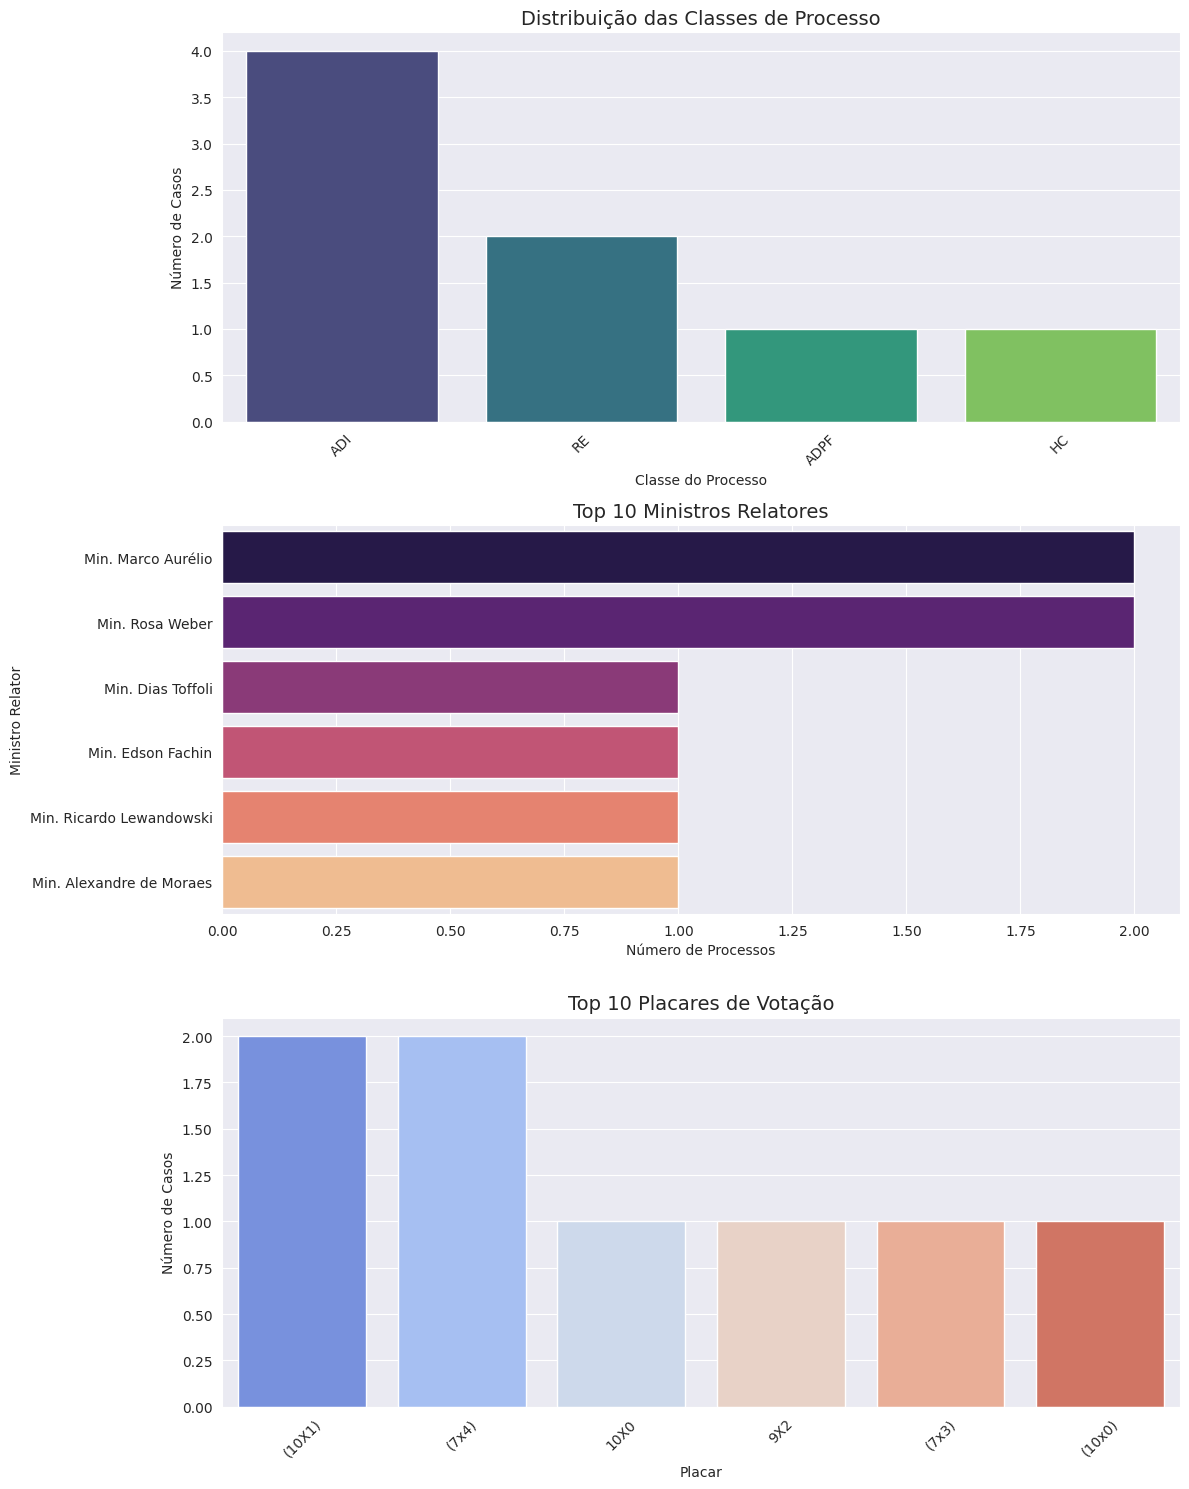

In [ ]:
# Remover espaços extras nos nomes das colunas
df.columns = df.columns.str.strip()

# Definir termos de interesse
termos_de_interesse = [
    "liberdade de expressão", "crime contra o Estado", "corrupção de menores", "direitos fundamentais",
    "liberdade de manifestação", "censura", "liberdade de imprensa", "liberdade de opinião", "direitos civis",
    "democracia", "subversão", "sabotagem", "traição", "conspiração", "atentado à ordem pública", "ameaça à segurança nacional"
]

# Unir colunas textuais relevantes
df["Texto_Completo"] = df[["Fatos", "Fundamentos da Decisão", "Questões Jurídicas", "Resumo"]].astype(str).agg(' '.join, axis=1)

# Filtrar processos que mencionam os termos de interesse
df["Contém_Termo"] = df["Texto_Completo"].apply(lambda x: any(t in x.lower() for t in termos_de_interesse))
df_filtrado = df[df["Contém_Termo"]]

# Exibir a contagem de processos encontrados
print(f"Número de processos encontrados: {df_filtrado.shape[0]}")

# Configurações gerais dos gráficos
sns.set_style("darkgrid")  # Ajustando para um estilo válido do Seaborn

# Distribuição das Classes de Processo
distribuicao_classes = df_filtrado["Classe"].value_counts()

# Frequência dos Ministros Relatores
frequencia_ministros = df_filtrado["Relator"].value_counts()

# Distribuição dos Placares de Votação
distribuicao_placares = df_filtrado["Placar"].value_counts()

# Criar a figura e eixos
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# 1. Distribuição das Classes de Processo
sns.barplot(x=distribuicao_classes.index, y=distribuicao_classes.values, ax=axes[0], hue=distribuicao_classes.index, palette="viridis", legend=False)
axes[0].set_title("Distribuição das Classes de Processo", fontsize=14)
axes[0].set_ylabel("Número de Casos")
axes[0].set_xlabel("Classe do Processo")
axes[0].tick_params(axis="x", rotation=45)

# 2. Ministros mais frequentes
top_ministros = frequencia_ministros.head(10)  # Pegando os 10 ministros mais frequentes
sns.barplot(x=top_ministros.values, y=top_ministros.index, ax=axes[1], hue=top_ministros.index, palette="magma", legend=False)
axes[1].set_title("Top 10 Ministros Relatores", fontsize=14)
axes[1].set_xlabel("Número de Processos")
axes[1].set_ylabel("Ministro Relator")

# 3. Distribuição dos Placares de Votação
top_placares = distribuicao_placares.head(10)  # Pegando os 10 placares mais frequentes
sns.barplot(x=top_placares.index, y=top_placares.values, ax=axes[2], hue=top_placares.index, palette="coolwarm", legend=False)
axes[2].set_title("Top 10 Placares de Votação", fontsize=14)
axes[2].set_ylabel("Número de Casos")
axes[2].set_xlabel("Placar")
axes[2].tick_params(axis="x", rotation=45)

# Ajustar o layout
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Processo', 'Classe', 'Número', 'Data Julgamento', 'Relator', 'Fatos',
       'Fundamentos da Decisão', 'Questões Jurídicas', 'Tese', 'Resultado',
       'Placar', 'Voto que Prevaleceu', 'Votos Divergentes', 'Votação', 'ODS',
       'Resumo  ', 'Ambiente de Julgamento'],
      dtype='object')


In [ ]:
# Exibir detalhes dos processos encontrados
detalhes_processos = df_filtrado[["Classe", "Relator", "Placar", "Texto_Completo"]]

# Exibir as primeiras 8 linhas (ou todas, se necessário)
print(detalhes_processos.head(8))  # Mostra as 8 primeiras linhas dos processos encontrados

    Classe                   Relator  Placar  \
44    ADPF        Min. Marco Aurélio    10X0   
49     ADI           Min. Rosa Weber  (10X1)   
50     ADI           Min. Rosa Weber  (10X1)   
66      RE        Min. Marco Aurélio     9X2   
76      RE         Min. Dias Toffoli   (7x4)   
92      HC         Min. Edson Fachin   (7x3)   
94     ADI  Min. Ricardo Lewandowski   (7x4)   
104    ADI  Min. Alexandre de Moraes  (10x0)   

                                        Texto_Completo  
44   Trata-se de ação constitucional (arguição de d...  
49   Trata-se de duas ações constitucionais (ações ...  
50   Trata-se de duas ações constitucionais (ações ...  
66   Trata-se de recurso extraordinário, com reperc...  
76   Trata-se de recurso extraordinário, com reperc...  
92   Trata-se de habeas corpus (ação que visa prote...  
94   As regras discutidas impedem a indicação para ...  
104  Trata-se de ação constitucional (ação direta d...  


In [ ]:
detalhes_processos

,Classe,Relator,Placar,Texto_Completo
44,ADPF,Min. Marco Aurélio,10X0,Trata-se de ação constitucional (arguição de d...
49,ADI,Min. Rosa Weber,(10X1),Trata-se de duas ações constitucionais (ações ...
50,ADI,Min. Rosa Weber,(10X1),Trata-se de duas ações constitucionais (ações ...
66,RE,Min. Marco Aurélio,9X2,"Trata-se de recurso extraordinário, com reperc..."
76,RE,Min. Dias Toffoli,(7x4),"Trata-se de recurso extraordinário, com reperc..."
92,HC,Min. Edson Fachin,(7x3),Trata-se de habeas corpus (ação que visa prote...
94,ADI,Min. Ricardo Lewandowski,(7x4),As regras discutidas impedem a indicação para ...
104,ADI,Min. Alexandre de Moraes,(10x0),Trata-se de ação constitucional (ação direta d...


In [ ]:
# Exibir o texto completo de todos os processos filtrados
for index, row in df_filtrado.iterrows():
    print(f"Processo {index}:")
    print(f"Classe: {row['Classe']}")
    print(f"Relator: {row['Relator']}")
    print(f"Placar: {row['Placar']}")
    print(f"Texto Completo:\n{row['Texto_Completo']}")
    print("-" * 80)  # Linha separadora

Processo 44:
Classe: ADPF
Relator: Min. Marco Aurélio
Placar: 10X0
Texto Completo:
Trata-se de ação constitucional (arguição de descumprimento de preceito fundamental) proposta pelo Partido Socialismo e Liberdade – PSOL, que pede que o STF declare a existência de um estado de coisas inconstitucional no sistema prisional brasileiro, tendo em vista o cenário de grave e massiva violação de direitos fundamentais dos presos. Pede, ainda, a determinação de um conjunto de medidas para reduzir a superlotação das prisões e promover a melhoria das condições de encarceramento.
Entre os fatos que exemplificam o tratamento desumano dado aos presos, estão celas superlotadas e imundas, falta de água e de materiais de higiene básicos, proliferação de doenças, mulheres dando à luz nas próprias penitenciárias, agressões e estupros, bem como a ausência de oportunidades de estudo e trabalho. 1. No sistema prisional brasileiro, há uma situação de violação em massa de direitos fundamentais dos presos, a exe

In [ ]:
import pandas as pd
# Carregar os dados simulados
data_socrates = pd.read_csv("julgamento_socrates_moderno.csv")

In [ ]:
data_socrates

,Caso,Acusação,Defesa,Contexto,Decisão STF
0,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Condenação - Discurso configurou incitação ao ...
1,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Condenação - Discurso configurou incitação ao ...
2,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Absolvição - Manifestação protegida pela liber...
3,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Condenação - Discurso configurou incitação ao ...
4,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Absolvição - Manifestação protegida pela liber...
...,...,...,...,...,...
95,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,"Decisão Parcial - Discurso permitido, mas com ..."
96,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Condenação - Discurso configurou incitação ao ...
97,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,Absolvição - Manifestação protegida pela liber...
98,Julgamento Moderno de Sócrates,Incitação à desordem pública e subversão das i...,Exercício da liberdade de expressão para promo...,Discussões filosóficas sobre o papel do govern...,"Decisão Parcial - Discurso permitido, mas com ..."


Sobre o Projeto

O projeto “Informação à Sociedade”

tem o objetivo de explicar, de forma didática, os principais pontos dos julgamentos do Supremo Tribunal Federal.

É possível verificar os fatos relativos a cada processo, as questões jurídicas, os fundamentos da decisão, como foi a votação, o resultado do julgamento e as teses definidas.

O serviço traz um resumo de todos os julgamentos presenciais e os virtuais de maior relevância a partir de outubro de 2023.

**Checklist do projeto "Python para Direito":**

**Desenvolvimento da Ferramenta**

✅ Implementar web scraping/APIs para coletar decisões jurídicas

✅ Coleta de Dados

✅ Extrair transcrições de julgamentos históricos

☐ Buscar jurisprudência moderna relevante (STF, ONU, Tribunais Internacionais)

 **Análise dos Dados**

☐ Utilizar NLP (NLTK, spaCy, BERT) para comparar textos históricos e modernos

☐ Identificar padrões de argumentação e decisões similares

 **Simulação**

☐ Definir o caso histórico e o tribunal moderno

☐ Aplicar modelos de aprendizado de máquina (TensorFlow/PyTorch) para prever decisões

☐ Calcular a probabilidade de absolvição/condenação com base na jurisprudência                                                                                                                                       
☐ Criar um painel interativo com Dash/Plotly para visualização dos resultados

 **Resultados e Validação**

☐ Gerar relatório com análise comparativa entre passado e presente

☐ Validar previsões com especialistas jurídicos

